IMPORTANT: Before you start, enter your name and student number below.

**Full Name:** Kishawn Srivijay

**Student Number:** 400234344

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and upload it to Colab.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [23]:
customers_df = pd.read_excel('W33836-XLS-ENG.xlsx', sheet_name='marketing')
customers_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
customers_df.shape

(2240, 29)

Therefore, the dataset has <b>2240 records</b> and <b>29 features</b>.

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [25]:
customers_df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Therefore, the <i>Income</i> column contains <b>24</b> missing entries.

In [26]:
customers_df[customers_df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11 00:00:00,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01 00:00:00,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07 00:00:00,23,352,...,6,0,0,0,0,0,0,3,11,0


I chose to ignore these fields and leave them as <i>NaN</i> (Not a Number), since that is the standard value for handling missing numerical data. Alternatively, I could have filled those fields with <i>None</i>, <i>Null</i>, or <i>Unknown</i>, but I believe <i>NaN</i> serves the same descriptive purpose, and it maintains the ability to manipulate the <i>Income</i> column values as floats. Also, I would not drop these records because those 24 customers still have defined meaningful values for all the other features, therefore their data is still valuable for analysis.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [27]:
customers_df.columns[customers_df.nunique() == 1]

Index(['Z_CostContact', 'Z_Revenue'], dtype='object')

Therefore, the <i>Z_CostContact</i> and <i>Z_Revenue</i> columns contain constant values.

In [28]:
customers_df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
customers_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [29]:
customers_df['Dt_Customer'] = pd.to_datetime(customers_df['Dt_Customer'])
today = datetime.today()
customers_df['Customer_Days'] = (today - customers_df['Dt_Customer']).dt.days
customers_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,4939
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4093
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4440
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4033
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4289


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


<Axes: title={'center': 'Education of Nata Supermarket Customers'}, ylabel='count'>

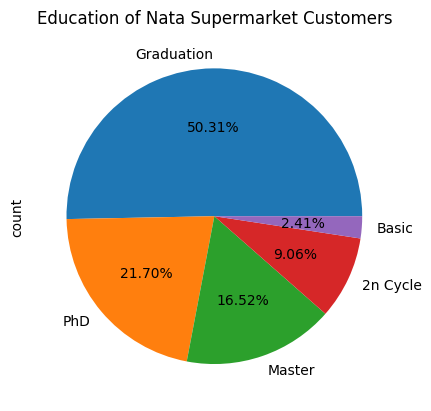

In [30]:
display(customers_df['Education'].value_counts())
customers_df['Education'].value_counts().plot(kind='pie', autopct='%1.2f%%', title='Education of Nata Supermarket Customers')

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


<Axes: title={'center': 'Marital Status of Nata Supermarket Customers'}, ylabel='count'>

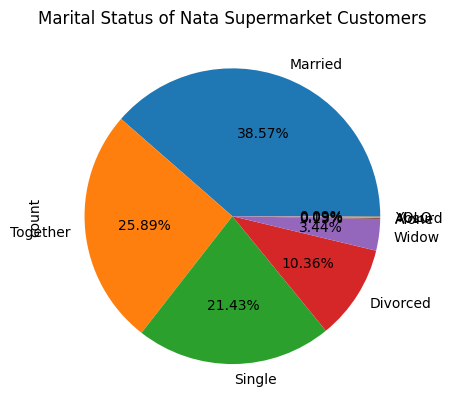

In [31]:
display(customers_df['Marital_Status'].value_counts())
customers_df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.2f%%', title='Marital Status of Nata Supermarket Customers')

My findings suggest that the company's target demographic is primarily mature, working adults, since majority of their customer base consists of married and educated customers. Over 50% of customers have attained graduation, while also including Masters and PhD graduates would account for nearly 90% of the customers. Furthermore, almost 40% of customers are married, while 10% are divorced and 3% are widowed. Assuming these categories almost definitely consist of adult customers, that would account for over 50% of the customers. Furthermore, if we assume that majority of the together category consists of adult relationships, then adults would account for nearly 80%. In addition, it can be assumed a fair subset of the single category consists of adults as well. Therefore, the breakdown of both these features align and support that the company's target demographic appears to be mature, working adults.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

Q1: $35303.00
Median: $51381.50
Q3: $68522.00


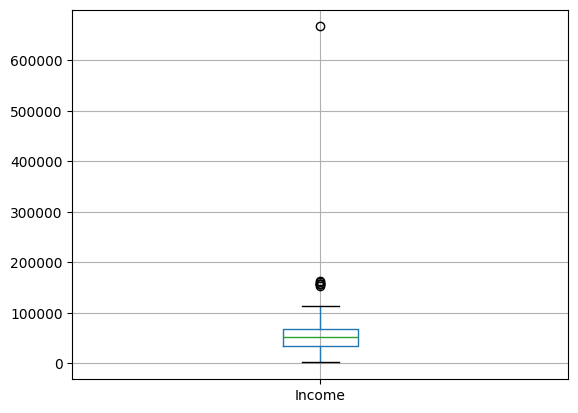

In [32]:
customers_df.boxplot('Income')
print(f'Q1: ${customers_df['Income'].quantile(0.25):.2f}')
print(f'Median: ${customers_df['Income'].quantile(0.5):.2f}')
print(f'Q3: ${customers_df['Income'].quantile(0.75):.2f}')

Q1: 0
Median: 0
Q3: 1


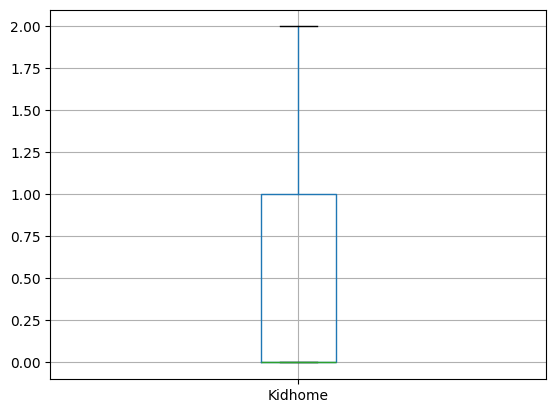

In [33]:
customers_df.boxplot('Kidhome')
print(f'Q1: {customers_df['Kidhome'].quantile(0.25):.0f}')
print(f'Median: {customers_df['Kidhome'].quantile(0.5):.0f}')
print(f'Q3: {customers_df['Kidhome'].quantile(0.75):.0f}')

Q1: 0
Median: 0
Q3: 1


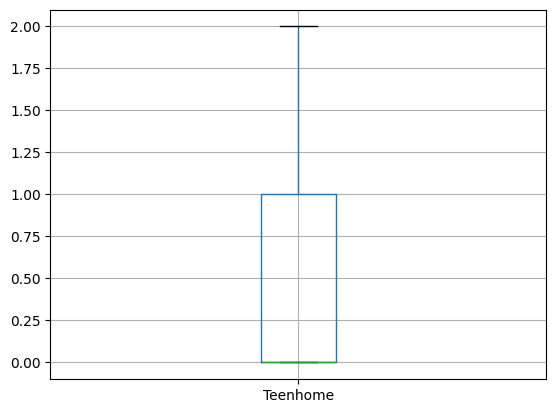

In [34]:
customers_df.boxplot('Teenhome')
print(f'Q1: {customers_df['Kidhome'].quantile(0.25):.0f}')
print(f'Median: {customers_df['Kidhome'].quantile(0.5):.0f}')
print(f'Q3: {customers_df['Kidhome'].quantile(0.75):.0f}')

Based on these distributions, the typical household profile of Nata's customers appears to be middle-class households without children. Even though some of the customers' households do have upwards of 2 kids or 2 teens, the median value for both features is zero. This means that at least half the customers have no kids and no teens in their household. In terms of income, though there are some outliers in the six figures range, half the customers are making approximately between \$35,000 and \$69,000, while the median customer is making just over \$51,000. This means that most of the central customers are earning around an average middle-class salary.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [35]:
customers_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

,0
MntWines,680816
MntFruits,58917
MntMeatProducts,373968
MntFishProducts,84057
MntSweetProducts,60621
MntGoldProds,98609


Therefore, the product with the highest total spending amount by all customers is <b>wine</b>.

## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

For some code cells, Gemini would automatically present a suggested block of code based on the preceding instructions, which was occasionally referenced and edited for correctness. Gemini in Colab was used to help with formatting f-string print statements efficiently throughout the notebook. No AI tools were used to describe the findings and provide insights.